### We are trying to predict what variables will be required to converts leads to customers and increase conversion rate from 30% to 80% . There are total 37 predictor variables. This project is for X education which is an online education company.

In [ ]:
# Suppressing Warnings
# Importing Pandas,NumPy, Seaborn and Matplotlib
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
lead_data = pd.read_csv('Leads.csv')
lead_data.drop(columns = "Prospect ID",inplace = True)
lead_data.set_index('Lead Number',inplace = True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 non-null object
What is your current occupation               

In [5]:
#Let's change Asymmetrique Activity Index and Asymmetrique Profile Index to numerical value (High=2,Medium=1,Low=0)
change1 = lead_data['Asymmetrique Activity Index'].str.split('.',expand = True)
change2 = lead_data['Asymmetrique Profile Index'].str.split('.',expand= True)
lead_data['Asymmetrique Activity Index'] = change1[0]
lead_data['Asymmetrique Profile Index'] = change2[0]
lead_data[["Asymmetrique Activity Index", "Asymmetrique Profile Index"]] = lead_data[["Asymmetrique Activity Index", "Asymmetrique Profile Index"]].apply(pd.to_numeric)


In [6]:
# Let's see the statistical aspect of continuous columns
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,1.908602,1.567503,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,0.476713,0.507780,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,2.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,2.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,2.000000,2.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,3.000000,3.000000,18.000000,20.000000


In [7]:
#Let's impute NULL values with value at 50% percentile
lead_data['Asymmetrique Activity Index'].fillna(value = 2 ,inplace = True)
lead_data['Asymmetrique Profile Index'].fillna(value = 2 ,inplace =True)
lead_data['Asymmetrique Activity Score'].fillna(value = 14 ,inplace =True)
lead_data['Asymmetrique Profile Score'].fillna(value = 16 ,inplace =True)



In [8]:
#Again checking type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 non-null object
What is your current occupation               

In [9]:
#Impute NULL values of Country False
lead_data['Country'].fillna(value = False,inplace = True)

In [10]:
#Keep only those values which are not false in the dataframe
lead_data = lead_data[(lead_data['Country'] != False)]

In [11]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 660728 to 579533
Data columns (total 35 columns):
Lead Origin                                      6779 non-null object
Lead Source                                      6778 non-null object
Do Not Email                                     6779 non-null object
Do Not Call                                      6779 non-null object
Converted                                        6779 non-null int64
TotalVisits                                      6779 non-null float64
Total Time Spent on Website                      6779 non-null int64
Page Views Per Visit                             6779 non-null float64
Last Activity                                    6779 non-null object
Country                                          6779 non-null object
Specialization                                   6187 non-null object
How did you hear about X Education               5427 non-null object
What is your current occupation               

### Dropping Columns which have ~90% similar values

In [12]:
lead_data.drop(columns =['I agree to pay the amount through cheque','Lead Profile','Get updates on DM Content','Update me on Supply Chain Content',
                         'Receive More Updates About Our Courses','Magazine','How did you hear about X Education',
                        'What matters most to you in choosing a course','What is your current occupation'],inplace = True)

In [13]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 660728 to 579533
Data columns (total 26 columns):
Lead Origin                               6779 non-null object
Lead Source                               6778 non-null object
Do Not Email                              6779 non-null object
Do Not Call                               6779 non-null object
Converted                                 6779 non-null int64
TotalVisits                               6779 non-null float64
Total Time Spent on Website               6779 non-null int64
Page Views Per Visit                      6779 non-null float64
Last Activity                             6779 non-null object
Country                                   6779 non-null object
Specialization                            6187 non-null object
Search                                    6779 non-null object
Newspaper Article                         6779 non-null object
X Education Forums                        6779 non-null object
News

In [14]:
#Imputing Tags and Lead Quality values with most frequent occurences 
lead_data['Tags'].fillna(value = 'Will revert after reading the email',inplace = True)
lead_data['Lead Quality'].fillna(value = 'Not Sure',inplace = True)
lead_data.dropna(inplace = True)

In [15]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6173 entries, 660728 to 579533
Data columns (total 26 columns):
Lead Origin                               6173 non-null object
Lead Source                               6173 non-null object
Do Not Email                              6173 non-null object
Do Not Call                               6173 non-null object
Converted                                 6173 non-null int64
TotalVisits                               6173 non-null float64
Total Time Spent on Website               6173 non-null int64
Page Views Per Visit                      6173 non-null float64
Last Activity                             6173 non-null object
Country                                   6173 non-null object
Specialization                            6173 non-null object
Search                                    6173 non-null object
Newspaper Article                         6173 non-null object
X Education Forums                        6173 non-null object
News

### Fit and Transform data by converting all columns into numerical ones.

In [16]:
from sklearn import preprocessing
Label_list = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity',
           'Country','Specialization','Search','Newspaper Article','X Education Forums',
           'Newspaper','Digital Advertisement','Through Recommendations','Tags','Lead Quality','City',
             'A free copy of Mastering The Interview','Last Notable Activity']
le = preprocessing.LabelEncoder()
for n in Label_list:
    le.fit(lead_data[n])
    lead_data[n] = le.transform(lead_data[n])
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6173 entries, 660728 to 579533
Data columns (total 26 columns):
Lead Origin                               6173 non-null int32
Lead Source                               6173 non-null int32
Do Not Email                              6173 non-null int32
Do Not Call                               6173 non-null int32
Converted                                 6173 non-null int64
TotalVisits                               6173 non-null float64
Total Time Spent on Website               6173 non-null int64
Page Views Per Visit                      6173 non-null float64
Last Activity                             6173 non-null int32
Country                                   6173 non-null int32
Specialization                            6173 non-null int32
Search                                    6173 non-null int32
Newspaper Article                         6173 non-null int32
X Education Forums                        6173 non-null int32
Newspaper     

### Test-Train Split

In [17]:
from sklearn.model_selection import train_test_split
y = lead_data['Converted']
X = lead_data.drop(columns = ['Converted'])


In [18]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
y_train.head()


Lead Number
631375    0
619066    0
596507    0
631355    0
587471    0
Name: Converted, dtype: int64

### Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

### Feature Selection Using RFE

In [20]:
rfe.support_

array([ True, False,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True])

In [21]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', False, 10),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', False, 11),
 ('Page Views Per Visit', False, 2),
 ('Last Activity', True, 1),
 ('Country', False, 6),
 ('Specialization', False, 7),
 ('Search', True, 1),
 ('Newspaper Article', True, 1),
 ('X Education Forums', True, 1),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Tags', False, 3),
 ('Lead Quality', True, 1),
 ('City', False, 8),
 ('Asymmetrique Activity Index', False, 5),
 ('Asymmetrique Profile Index', True, 1),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', True, 1),
 ('A free copy of Mastering The Interview', False, 4),
 ('Last Notable Activity', True, 1)]

### Assessing the model with StatsModels

In [22]:
col = X_train.columns[rfe.support_]
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4321
Model:                            GLM   Df Residuals:                     4305
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1857.6
Date:                Mon, 26 Aug 2019   Deviance:                       3715.1
Time:                        15:24:04   Pearson chi2:                 5.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -11.2810      1.417     -7.962      0.000     -14.058      -8.504
Lead Origin                    -0.2348      0.103     -2.271      0.023      -0.437      -0.032
Do Not Email                   -1.8260      0.208     -8.796      0.000      -2.233      -1.419
Do Not Call                    22.9921   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity                   0.1097      0.020      5.503      0.000       0.071       0.149
Search                         -1.9372      1.308     -1.481      0.138      -4.500       0.626
Newspaper Article              21.8576   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
X Education Forums            -63.6870   7.08e+04     -0.001      0.999   -1.39e+05    1.39e+05
Newspaper                     -20.8516   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement          -0.8207      1.277     -0.643      0.520      -3.323       1.682
Through Recommendations        22.8802   1.93e+04      0.001      0.999   -3.77e+04    3.78e+04
Lead Quality                   -1.7229      0.062    -27.778      0.000      -1.844      -1.601
Asymmetrique Profile Index      0.5176      0.160      3.240      0.001       0.204       0.831
Asymmetrique Activity Score     0.7469      0.052     14.339      0.000       0.645       0.849
Asymmetrique Profile Score      0.1640      0.056      2.936      0.003       0.055       0.273
Last Notable Activity           0.0767      0.022      3.463      0.001       0.033       0.120
===============================================================================================
"""

In [23]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
631375    0.336609
619066    0.136269
596507    0.087448
631355    0.502107
587471    0.219936
644758    0.835158
621360    0.152590
646741    0.056525
642553    0.032027
586022    0.036204
dtype: float64

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [24]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.reset_index(inplace = True)
y_train_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,631375,0,0.336609
1,619066,0,0.136269
2,596507,0,0.087448
3,631355,0,0.502107
4,587471,0,0.219936


In [25]:
numbers = [float(i)/10 for i in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,631375,0,0.336609,1,1,1,1,0,0,0,0,0,0
1,619066,0,0.136269,1,1,0,0,0,0,0,0,0,0
2,596507,0,0.087448,1,0,0,0,0,0,0,0,0,0
3,631355,0,0.502107,1,1,1,1,1,1,0,0,0,0
4,587471,0,0.219936,1,1,1,0,0,0,0,0,0,0


### Confusion matrix for overall accuracy, sensivity, specificity

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386716  1.000000  0.000000
0.1   0.1  0.570007  0.974865  0.314717
0.2   0.2  0.735941  0.896469  0.634717
0.3   0.3  0.772738  0.853381  0.721887
0.4   0.4  0.813006  0.742669  0.857358
0.5   0.5  0.809303  0.665470  0.900000
0.6   0.6  0.800046  0.597247  0.927925
0.7   0.7  0.794492  0.561341  0.941509
0.8   0.8  0.743578  0.378815  0.973585
0.9   0.9  0.692664  0.222621  0.989057


### ROC Curve Plotted

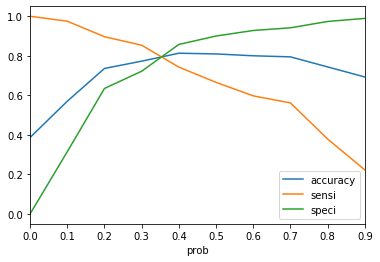

In [27]:
cutoff_df.plot.line(x = 'prob',y = ['accuracy','sensi','speci'])
plt.show()

### Final prediction, confusion matrix and overall accuracy

In [28]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead Number,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,631375,0,0.336609,1,1,1,1,0,0,0,0,0,0,0
1,619066,0,0.136269,1,1,0,0,0,0,0,0,0,0,0
2,596507,0,0.087448,1,0,0,0,0,0,0,0,0,0,0
3,631355,0,0.502107,1,1,1,1,1,1,0,0,0,0,1
4,587471,0,0.219936,1,1,1,0,0,0,0,0,0,0,0


In [29]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction )
print(confusion)

[[2077  573]
 [ 283 1388]]


In [30]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction))

0.8018977088636889


### Metrics beyond simply accuracy

In [31]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [32]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8306403351286654

In [33]:
# Let us calculate specificity
TN / float(TN+FP)

0.7837735849056604

In [34]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21622641509433962


In [35]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7078021417644059


In [36]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8800847457627119


In [37]:
#Precision TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7078021417644059

In [38]:
#Recall TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8306403351286654

### Making predictions on the test set

In [39]:
col = X_test.columns[rfe.support_]
X_test_sm = sm.add_constant(X_test[col])

In [40]:
y_test_pred = res.predict(X_test_sm)

In [41]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [42]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [43]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_test_pred_final.reset_index(inplace = True)
y_test_pred_final.head()


,Lead Number,Converted,0
0,613614,0,0.808212
1,608009,0,0.070316
2,644388,0,0.239173
3,583083,1,0.771919
4,623733,0,0.152590


In [45]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [46]:
y_test_pred_final['final_prediction'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [47]:
y_test_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_prediction
0,613614,0,0.808212,1
1,608009,0,0.070316,0
2,644388,0,0.239173,0
3,583083,1,0.771919,1
4,623733,0,0.152590,0


In [48]:
# Accuracy ~80% on test set
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_prediction)

0.7921166306695464

In [49]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_prediction)
confusion2

array([[872, 257],
       [128, 595]], dtype=int64)